In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [109]:
df = pd.read_csv('insurance_part2_data.csv')

In [110]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [111]:
df.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [112]:
df.Duration.value_counts()

 8       83
 5       82
 6       81
 10      81
 11      81
         ..
 466      1
 421      1
-1        1
 119      1
 4580     1
Name: Duration, Length: 257, dtype: int64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [114]:
df.shape

(3000, 10)

In [115]:
pd.set_option('display.max_rows',10)
dups=df.duplicated()
df[dups]


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [116]:
df.drop_duplicates(inplace=True) 

In [117]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(df.shape)

Number of duplicate rows = 0
(2861, 10)


In [118]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

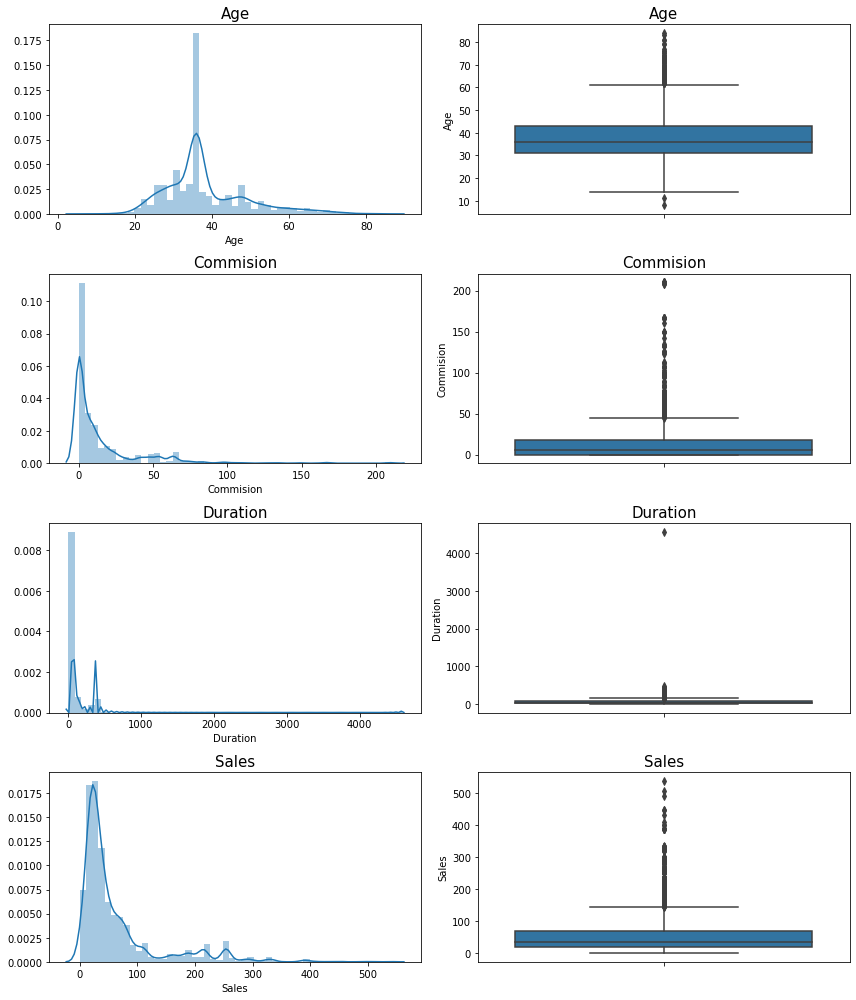

In [119]:
## Univariate except class column
fig,axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 14)
a = sns.distplot(df['Age'] , ax=axes[0][0])
a.set_title("Age",fontsize=15)
a = sns.boxplot(df['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age",fontsize=15)

a = sns.distplot(df['Commision'] , ax=axes[1][0])
a.set_title("Commision",fontsize=15)
a = sns.boxplot(df['Commision'] , orient = "v" , ax=axes[1][1])
a.set_title("Commision",fontsize=15)

a = sns.distplot(df['Duration'] , ax=axes[2][0])
a.set_title("Duration",fontsize=15)
a = sns.boxplot(df['Duration'] , orient = "v" , ax=axes[2][1])
a.set_title("Duration",fontsize=15)

a = sns.distplot(df['Sales'] , ax=axes[3][0])
a.set_title("Sales",fontsize=15)
a = sns.boxplot(df['Sales'] , orient = "v" , ax=axes[3][1])
a.set_title("Sales",fontsize=15)


plt.tight_layout()
plt.show()


<AxesSubplot:>

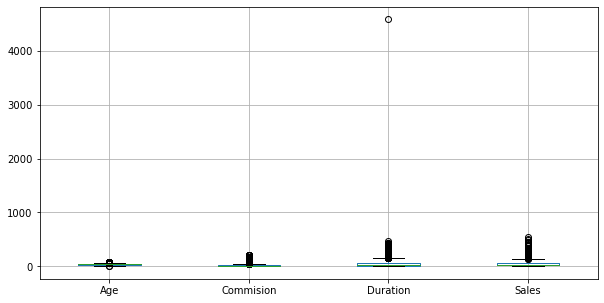

In [120]:
plt.figure(figsize=(10,5))
df.boxplot() 

In [121]:
df.Duration.median()

28.0

In [122]:
Duration_median=df["Duration"].median()
df["Duration"].replace(0,Duration_median,inplace=True) 
Duration_median=df["Duration"].median()
df["Duration"].replace(-1,Duration_median,inplace=True) 

In [123]:
df.Duration.value_counts()

10      78
6       77
11      77
9       75
8       71
        ..
434      1
466      1
421      1
119      1
4580     1
Name: Duration, Length: 255, dtype: int64

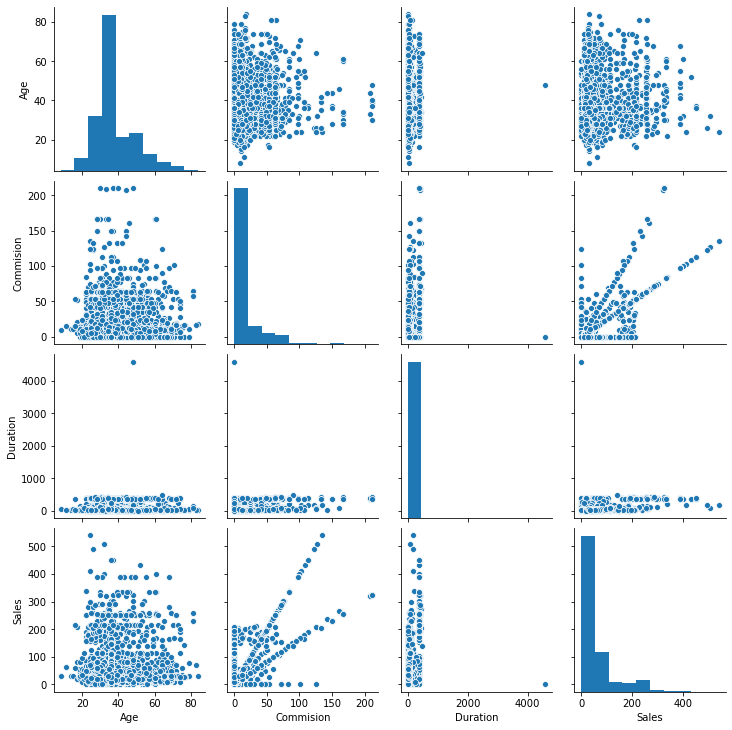

In [124]:
sns.pairplot(df)

In [125]:
df.corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.064759,0.027425,0.036187
Commision,0.064759,1.000000,0.462186,0.762181
Duration,0.027425,0.462186,1.000000,0.549896
Sales,0.036187,0.762181,0.549896,1.000000


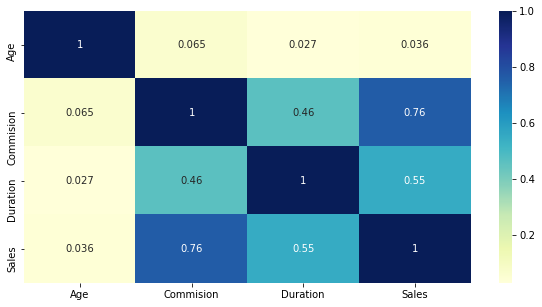

In [126]:
plt.figure(figsize=(10,5)) 
sns.heatmap(data=df.corr(),annot=True,cmap = 'YlGnBu');

In [127]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [128]:
df.describe()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,1.280671,0.597344,0.319469,15.080996,0.983922,72.149948,61.757878,1.666550,0.261797
std,10.678106,1.003773,0.490518,0.466352,25.826834,0.125799,135.964455,71.399740,1.277822,0.586239
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,0.000000,5.630000,1.000000,28.000000,33.500000,2.000000,0.000000
75%,43.000000,2.000000,1.000000,1.000000,17.820000,1.000000,66.000000,69.300000,2.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,210.210000,1.000000,4580.000000,539.000000,4.000000,2.000000


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 208.5 KB


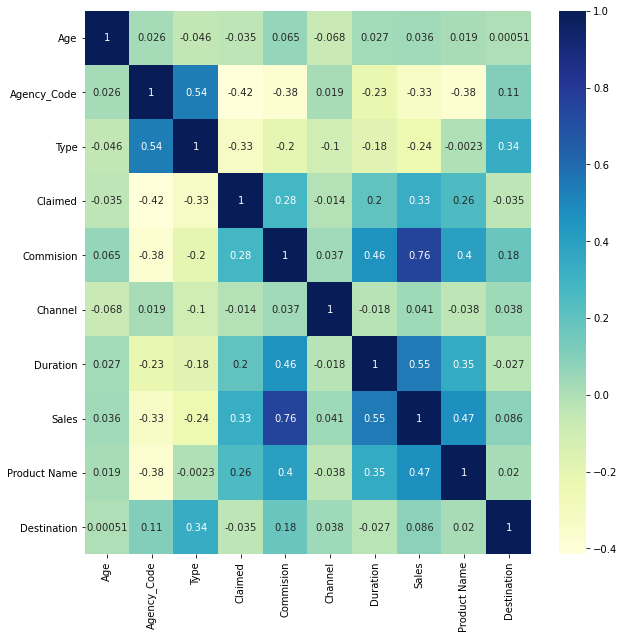

In [130]:
plt.figure(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu');

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 208.5 KB


In [132]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [133]:
df.Claimed.value_counts()

0    1947
1     914
Name: Claimed, dtype: int64

In [134]:
df.Claimed.value_counts(normalize=True)*100

0    68.053128
1    31.946872
Name: Claimed, dtype: float64

In [136]:
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [137]:
X.Agency_Code.value_counts()

2    1238
0     913
1     471
3     239
Name: Agency_Code, dtype: int64

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [139]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [140]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [5,10,15],
    'min_samples_leaf': [30,50,70], 
    'min_samples_split': [100,150,200],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10) 

In [141]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 200}


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [142]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 30,
 'min_samples_split': 200}

In [143]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [144]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.579764
Sales         0.294460
Product Name  0.045725
Commision     0.043767
Duration      0.023026
Age           0.013258
Type          0.000000
Channel       0.000000
Destination   0.000000


In [145]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [146]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.573171,0.426829
1,0.971223,0.028777
2,0.274112,0.725888
3,0.837500,0.162500
4,0.837500,0.162500


AUC: 0.814


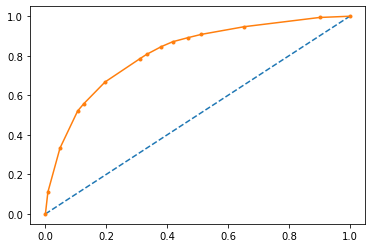

In [147]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr,cart_train_tpr, marker='.')
plt.show()

In [148]:
from sklearn.metrics import classification_report,confusion_matrix

In [149]:
confusion_matrix(train_labels,ytrain_predict)


array([[1215,  144],
       [ 308,  335]], dtype=int64)

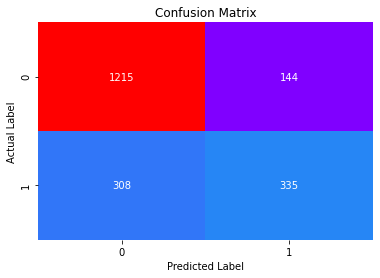

In [150]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [151]:
cart_train_acc = best_grid.score(X_train,train_labels)
cart_train_acc

0.7742257742257742

In [152]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.70      0.52      0.60       643

    accuracy                           0.77      2002
   macro avg       0.75      0.71      0.72      2002
weighted avg       0.77      0.77      0.76      2002



In [153]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.7
cart_train_recall  0.52
cart_train_f1  0.6


# TEST DATA

AUC: 0.795


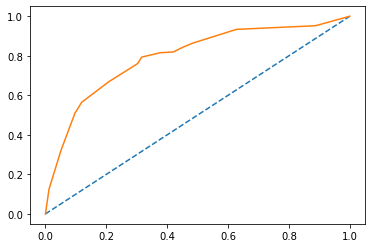

In [154]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr)

In [155]:
confusion_matrix(test_labels,ytest_predict)

array([[531,  57],
       [133, 138]], dtype=int64)

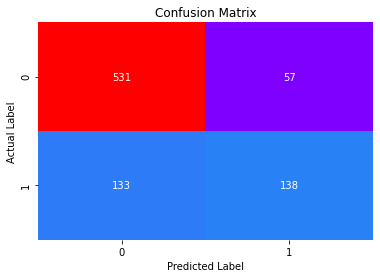

In [156]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [157]:
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7788125727590222

In [158]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       588
           1       0.71      0.51      0.59       271

    accuracy                           0.78       859
   macro avg       0.75      0.71      0.72       859
weighted avg       0.77      0.78      0.77       859



In [159]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.71
cart_test_recall  0.51
cart_test_f1  0.59


# Cart Model conclusion:


<b>Train Data:</b>
     
     
     AUC: 81% 
     Accuracy:77%
     Precision:70%
     F1 Score: 60%
    
    
<b>Test Data:</b>      
    
    
    AUC: 79%      
    Accuracy: 78%         
    Precision: 71%       
    f1-Score: 59%     
  
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  

Accuracy, AUC, Precision and Recall for test data is almost inline with training data.  
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

  
Agency code is the most important variable for predicting the claim frequency.




In [161]:
A = X_test
A

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
642,31,1,1,0.00,0,402,97.0,2,0
219,68,2,1,0.00,1,60,29.0,1,0
1685,42,0,0,21.00,1,11,84.0,4,0
962,44,1,1,23.76,1,51,39.6,2,0
800,50,1,1,35.64,1,111,59.4,2,0
...,...,...,...,...,...,...,...,...,...
2948,19,1,1,10.50,0,32,30.0,2,0
2203,45,2,1,0.00,1,37,22.0,2,0
445,51,0,0,4.00,1,5,16.0,0,0
2964,53,2,1,0.00,1,13,21.0,2,0


In [162]:
B = test_labels

642     0
219     0
1685    0
962     0
800     1
       ..
2948    0
2203    0
445     0
2964    0
2055    1
Name: Claimed, Length: 859, dtype: int8

In [164]:
B = pd.DataFrame(test_labels)
B

,Claimed
642,0
219,0
1685,0
962,0
800,1
...,...
2948,0
2203,0
445,0
2964,0


In [165]:
A['Prediction'] = B

C:\Users\shara\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [166]:
A.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination,Prediction
642,31,1,1,0.00,0,402,97.0,2,0,0
219,68,2,1,0.00,1,60,29.0,1,0,0
1685,42,0,0,21.00,1,11,84.0,4,0,0
962,44,1,1,23.76,1,51,39.6,2,0,0
800,50,1,1,35.64,1,111,59.4,2,0,1


In [171]:
A.groupby(['Agency_Code','Prediction']).size()

Agency_Code  Prediction
0            0              98
             1             168
1            0             101
             1              39
2            0             330
             1              59
3            0              59
             1               5
dtype: int64

In [177]:
pd.crosstab(A['Product Name'],A['Agency_Code']) 

Agency_Code,0,1,2,3
Product Name,,,,
0,125,5,0,64
1,0,0,210,0
2,13,109,179,0
3,18,20,0,0
4,110,6,0,0


In [178]:
pd.crosstab(A['Prediction'],A['Agency_Code']) 

Agency_Code,0,1,2,3
Prediction,,,,
0,98,101,330,59
1,168,39,59,5


In [173]:
pd.crosstab(A['Prediction'],A['Product Name']) 

Product Name,0,1,2,3,4
Prediction,,,,,
0,119,194,233,12,30
1,75,16,68,26,86


# RANDOM FOREST

In [54]:
param_grid = {
    'max_depth': [5],
    'max_features': [6],
    'min_samples_leaf': [15],
    'min_samples_split': [50],
    'n_estimators': [300],
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [55]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [56]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 6,
 'min_samples_leaf': 15,
 'min_samples_split': 50,
 'n_estimators': 300}

In [57]:
best_grid = grid_search.best_estimator_

In [58]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [59]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [60]:
confusion_matrix(train_labels,ytrain_predict)

array([[1208,  151],
       [ 268,  375]], dtype=int64)

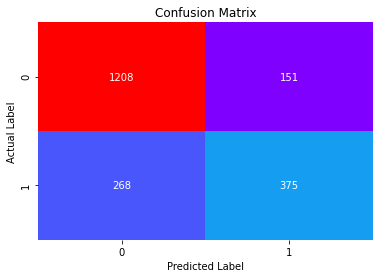

In [61]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [62]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.7907092907092907

In [63]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.71      0.58      0.64       643

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.78      0.79      0.78      2002



In [64]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.71
rf_train_recall  0.58
rf_train_f1  0.64


Area under Curve is 0.8372842990168646


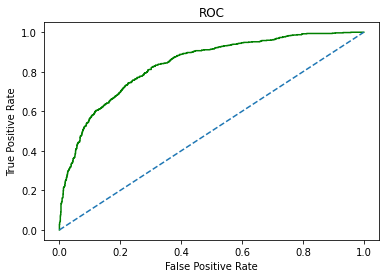

In [65]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

# Test data

In [66]:
confusion_matrix(test_labels,ytest_predict)

array([[516,  72],
       [116, 155]], dtype=int64)

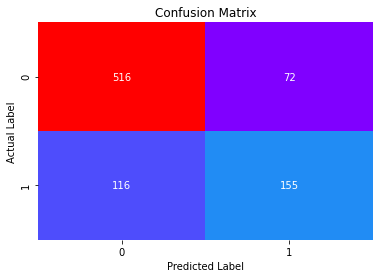

In [67]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [68]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7811408614668219

In [69]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       588
           1       0.68      0.57      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.77      0.78      0.78       859



In [70]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.68
rf_test_recall  0.57
rf_test_f1  0.62


Area under Curve is 0.8184131586213821


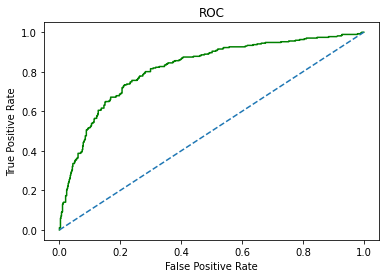

In [71]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [72]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.383832
Product Name  0.202545
Sales         0.199850
Commision     0.087674
Duration      0.057335
Age           0.038983
Type          0.019303
Destination   0.009785
Channel       0.000692


## RANDOM FOREST CONCLUSION


<b> TRAIN DATA </b>

    AUC: 84%
    ACCURACY: 79%
    PRECISION: 71%
    F1 SCORE:64%
    
<b> TEST DATA: </b>

    
    AUC: 82% 
    ACCURACY: 78%
    PRECISION: 68%
    F1 - SCORE: 62%  
    
    Training and Test set results are almost similar, and with the overall measures high, the model is a good model.
    
    Agency code is again the important feature for prediction the frequency of claim. There is a difference of only 2% between the training and testing data AUC. There is no overfitting or underfitting here.

## Neural Network

In [73]:
sc = StandardScaler()

In [74]:
X_train = sc.fit_transform(X_train)
X_train

array([[ 2.88764239, -1.2626112 , -1.19813318, ..., -0.65375471,
        -1.31338076, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.37032806,
         0.24339146, -0.44775345],
       [ 2.04101412, -0.27289013,  0.83463176, ...,  0.11574864,
         0.24339146,  1.24676906],
       ...,
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.68209737,
        -0.53499465, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146,  1.24676906]])

In [75]:
X_test = sc.transform(X_test)
X_test

array([[-0.68701032, -0.27289013,  0.83463176, ...,  0.50829455,
         0.24339146, -0.44775345],
       [ 2.79357258,  0.71683095,  0.83463176, ..., -0.45535606,
        -0.53499465, -0.44775345],
       [ 0.34775757, -1.2626112 , -1.19813318, ...,  0.32406723,
         1.80016368, -0.44775345],
       ...,
       [ 1.19438584, -1.2626112 , -1.19813318, ..., -0.63958338,
        -1.31338076, -0.44775345],
       [ 1.38252546,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345]])

In [76]:
param_grid = {
    'hidden_layer_sizes': [100,],
    'max_iter': [150,250,500],
    'solver': ['adam'], 
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [77]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 150, 'solver': 'adam', 'tol': 0.01}

In [78]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=150,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [79]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [80]:
confusion_matrix(train_labels,ytrain_predict)

array([[1159,  200],
       [ 285,  358]], dtype=int64)

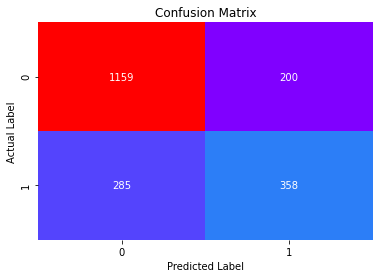

In [81]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [82]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7577422577422578

In [83]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1359
           1       0.64      0.56      0.60       643

    accuracy                           0.76      2002
   macro avg       0.72      0.70      0.71      2002
weighted avg       0.75      0.76      0.75      2002



In [84]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.64
nn_train_recall  0.56
nn_train_f1  0.6


Area under Curve is 0.792115119867893


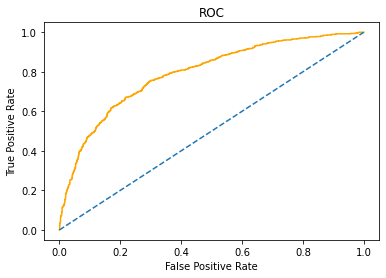

In [85]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [86]:
confusion_matrix(test_labels,ytest_predict)

array([[511,  77],
       [122, 149]], dtype=int64)

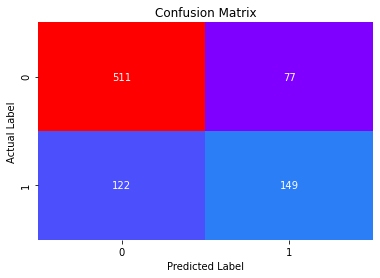

In [87]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [88]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7683352735739232

In [89]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       588
           1       0.66      0.55      0.60       271

    accuracy                           0.77       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.76      0.77      0.76       859



In [90]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.66
nn_test_recall  0.55
nn_test_f1  0.6


Area under Curve is 0.7978512438185605


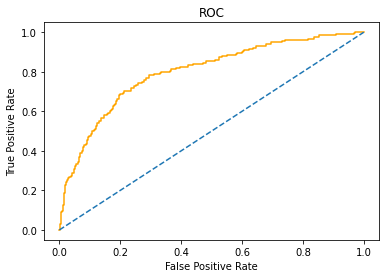

In [91]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [92]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=150,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)>

# NEURAL NETWORK CONCLUSION
<b> TRAIN DATA </b>
    
    
    AUC 79%
    ACCURACY 76%
    PRECISION 64%
    F1 SCORE 60%
    

    
<b> TEST DATA </b>
    
    
    
    AUC 80%
    ACCURACY 77%
    PRECISION 68%
    F1 SCORE 62%
    
Training and Test set results are almost similar, and with the overall measures high, the model is a good model.  

# ALL MODELS COMPARISON

In [93]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.77,0.78,0.79,0.78,0.76,0.77
AUC,0.81,0.80,0.84,0.82,0.79,0.80
Recall,0.52,0.51,0.58,0.57,0.56,0.55
Precision,0.70,0.71,0.71,0.68,0.64,0.66
F1 Score,0.60,0.59,0.64,0.62,0.60,0.60


## ROC CURVE FOR 3 MODELS TRAIN DATA

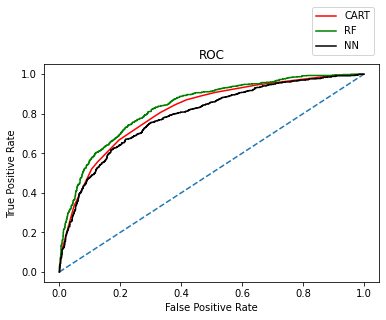

In [94]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

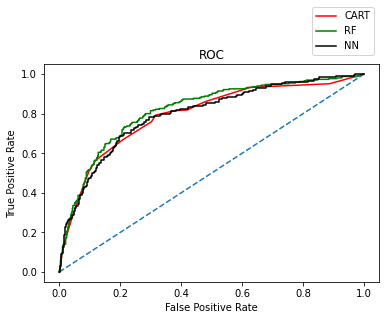

In [95]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')